In [ ]:
# colab 한글깨짐 해결위한 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 런타임 재시작 !

# 1. LinearSVM (선형 서포트 벡터 머신)

In [1]:
# matplotlib과 관련된 모듈을 미리 선언
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_features = 2, n_redundant = 0, n_informative = 1,
                          n_classes = 2, n_clusters_per_class = 1, random_state = 30)
# 사이킷런의 SVM패키지 안에 서포트 벡터 머신의 모형 SVC(Support Vector Classifier)를 제공한다.

In [3]:
y

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0])

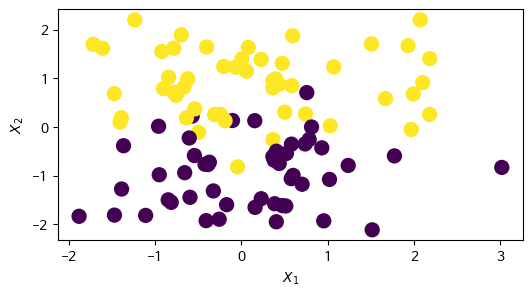

In [5]:
plt.figure(figsize = (6, 3))
plt.scatter(X[:, 0], X[:, 1], marker = 'o', c = y, s = 100)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                   shuffle = True)

In [7]:
#1번 임포트 모델
from sklearn.svm import SVC

#2번 모델 선택 & 모델.fit(학습데이터)
linear_svc = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)

In [8]:
SVC?

SVC의 매개변수
- kernel : 커널을 설정한다, 기본값은 'rbf'
  - 'rbf'가 무엇인지?
- C : 슬랙 변수 가중치(slack variable weight) 즉, 모델의 오차허용률을 조절한다, 기본값은 1.0
- C는 얼마나 많은 데이터 샘플들을 다른 클래스에 놓이는 것을 허용하는지를 정해준다.
- 높은 C값은 모델을 더 유연하게 만들어주는 반면에, 낮은 C값은 모델을 더 안정적으로 만들어준다.

In [9]:
linear_svc.n_support_
# 각 클래스의 서포트의 개수, support vector의 개수

array([11, 11], dtype=int32)

In [ ]:
linear_svc.support_vectors_
# 각 클래스의 서포트 x값 (x+. x-)

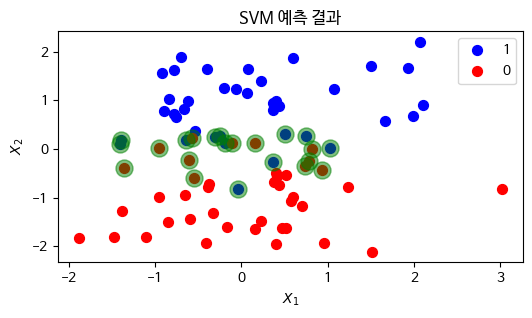

In [12]:
plt.figure(figsize = (6,3))
plt.scatter(X_train[y_train == 1, 0], X_train[y_train ==1, 1], c = 'b', label = '1', s=50)
plt.scatter(X_train[y_train == 0, 0], X_train[y_train ==0, 1], c = 'r', label = '0', s=50)
plt.scatter(linear_svc.support_vectors_[:, 0], linear_svc.support_vectors_[:, 1],
           s = 150, c = 'g', alpha = 0.5)
# alpha는 투명도
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.legend()
plt.title("SVM 예측 결과")

plt.show()

In [13]:
print('train score : {}\n\n'.format(linear_svc.score(X_train, y_train)))
print('test score : {}'.format(linear_svc.score(X_test, y_test)))

train score : 0.9125


test score : 0.9


In [14]:
print('실제 : {}'.format(y_test))
print('예측 : {}'.format(linear_svc.predict(X_test)))

print(len(y_test))

실제 : [1 1 0 1 0 0 0 1 1 1 1 0 0 1 0 0 1 0 1 1]
예측 : [1 1 0 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 0 1]
20


In [15]:
linear_svc01 = SVC(kernel = 'linear', C = 0.1).fit(X_train, y_train)
# 비교를 위해 C값을 매우 적게 설정했다.

In [16]:
linear_svc01.n_support_

array([19, 19], dtype=int32)

In [ ]:
linear_svc01.support_vectors_

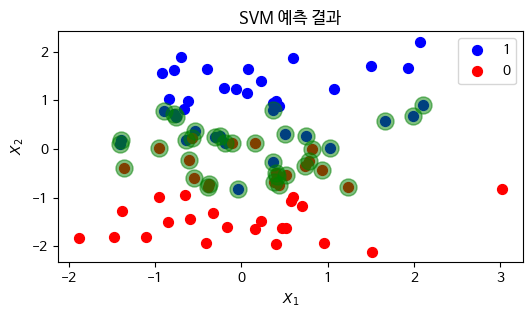

In [18]:
plt.figure(figsize = (6,3))
plt.scatter(X_train[y_train == 1, 0], X_train[y_train ==1, 1], c = 'b', label = '1', s=50)
plt.scatter(X_train[y_train == 0, 0], X_train[y_train ==0, 1], c = 'r', label = '0', s=50)
plt.scatter(linear_svc01.support_vectors_[:, 0], linear_svc01.support_vectors_[:, 1],
           s = 150, c = 'g', alpha = 0.5)
# alpha는 투명도
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.legend()
plt.title("SVM 예측 결과")

plt.show()

In [19]:
linear_svc10 = SVC(kernel = 'linear', C = 10).fit(X_train, y_train)

In [20]:
linear_svc10.n_support_

array([9, 9], dtype=int32)

In [ ]:
linear_svc10.support_vectors_

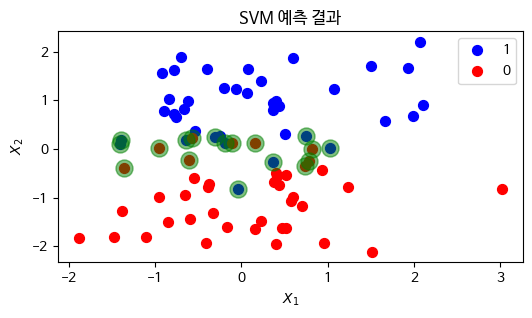

In [22]:
plt.figure(figsize = (6,3))
plt.scatter(X_train[y_train == 1, 0], X_train[y_train ==1, 1], c = 'b', label = '1', s=50)
plt.scatter(X_train[y_train == 0, 0], X_train[y_train ==0, 1], c = 'r', label = '0', s=50)
plt.scatter(linear_svc10.support_vectors_[:, 0], linear_svc10.support_vectors_[:, 1],
           s = 150, c = 'g', alpha = 0.5)
# alpha는 투명도
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.legend()
plt.title("SVM 예측 결과")

plt.show()

SVM모델이 과적합이라면 C값을 줄여보도록 하자.

### 기본예제

In [23]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

data_iris = load_iris()
X = data_iris.data

y = data_iris.target

In [ ]:
print(data_iris.DESCR)

In [26]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [27]:
y[:5]

array([0, 0, 0, 0, 0])

In [28]:
data_iris.feature_names
# iris 데이터의 4가지 특성

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [30]:
data_iris.target_names
# iris의 데이터의 target

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

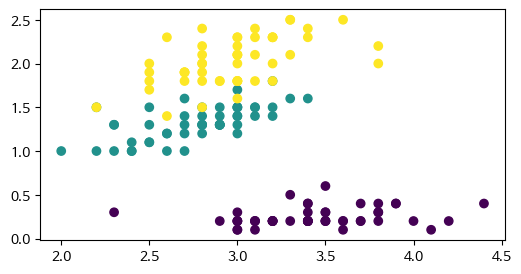

In [31]:
plt.figure(figsize = (6, 3))
plt.scatter(X[:, 1], X[:, 3], c = y)
plt.show()

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   stratify = data_iris.target,
                                                     shuffle = True)

# stratify -> target 데이터의 클래스 비율에 맞게 데이터를 split

In [34]:
from collections import Counter
Counter(y_train)

Counter({0: 38, 1: 37, 2: 37})

In [35]:
linear_svm = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)

print('test score : {}'.format(linear_svm.score(X_test, y_test)))

test score : 0.9473684210526315


In [36]:
linear_svm.predict(X_test)
# 예측값

array([1, 2, 1, 0, 1, 2, 0, 0, 0, 2, 1, 2, 0, 2, 0, 0, 2, 2, 2, 1, 0, 0,
       1, 2, 0, 2, 1, 1, 1, 0, 2, 2, 1, 2, 1, 2, 0, 2])

In [37]:
y_test
# 실제값

array([1, 2, 1, 0, 1, 2, 0, 0, 0, 2, 1, 2, 0, 2, 0, 0, 2, 2, 2, 1, 0, 0,
       1, 1, 0, 2, 1, 1, 1, 0, 1, 2, 1, 2, 1, 2, 0, 2])

In [39]:
np.argmax(linear_svm.decision_function(X_test), axis=1)
# 확률수치를 알 수 있는 predict_proba()가 제공되지는 않지만 decision_function()이 제공된다.

array([1, 2, 1, 0, 1, 2, 0, 0, 0, 2, 1, 2, 0, 2, 0, 0, 2, 2, 2, 1, 0, 0,
       1, 2, 0, 2, 1, 1, 1, 0, 2, 2, 1, 2, 1, 2, 0, 2])

In [45]:
# 시각화를 위해서 2개의 특성만 사용했다. (sepal width, pedal length)
data_x = data_iris.data[:, [1,3]]
data_y = data_iris.target

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size = 0.2,
                                                   shuffle = True, random_state=30)
linear_svm = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)

print('test score : {}'.format(linear_svm.score(X_test, y_test)))

test score : 0.9333333333333333


In [ ]:
%pip install mglearn

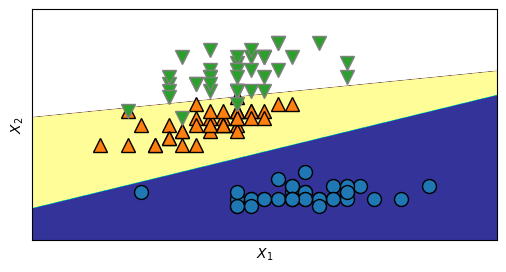

In [46]:
import mglearn
# 시각화를 위해 mglearn모듈을 사용했다.

plt.figure(figsize=(6,3))
mglearn.plots.plot_2d_classification(linear_svm, X_train, eps=0.5, cm = 'terrain')
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()
#

C값을 변경해보자

In [47]:
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
# C값을 변경해 가면서 각 모델들의 score를 확인하고자 한다.
# 한 번에 확인하기 위해서 C값을 리스트로 저장하고 for문을 이용하여 score를 구했다.
train_score = []
test_score = []

for i in C:
    linear_svm = SVC(kernel = 'linear', C = i).fit(X_train, y_train)
    scoretr = linear_svm.score(X_train, y_train)
    scorete = linear_svm.score(X_test, y_test)
    train_score.append(scoretr)
    test_score.append(scorete)

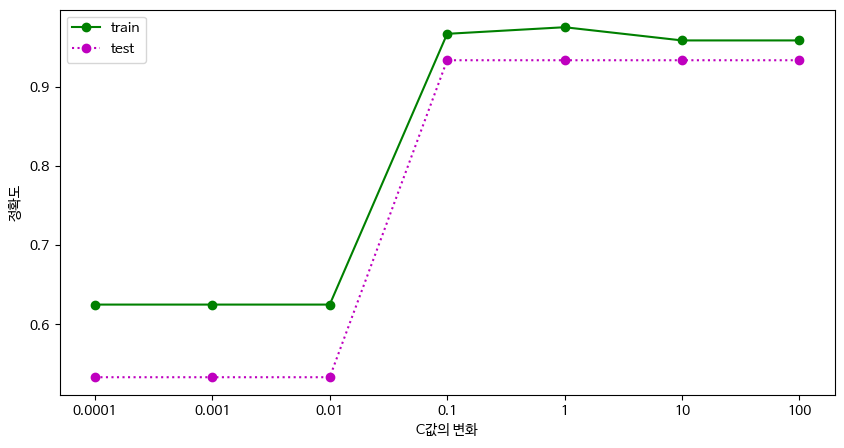

In [48]:
plt.figure(figsize = (10, 5))
plt.plot(train_score, 'go-')
plt.plot(test_score, 'mo:')
plt.xticks(range(len(C)), C)
plt.xlabel('C값의 변화')
plt.ylabel('정확도')
plt.legend(['train', 'test'])
plt.show()

C값이 커질수록 과적합되는 모습을 볼 수 있다.
적절한 C값을 찾아줘야 한다.

### svm.LinearSVC()로 구현해보기

In [51]:
LinearSVC?

In [50]:
from sklearn.svm import LinearSVC
linear_svc2 = LinearSVC(C = 1, loss = 'hinge').fit(X_train, y_train)

In [52]:
print('train score : {}\n\n'.format(linear_svc2.score(X_train, y_train)))
print('test score : {}'.format(linear_svc2.score(X_test, y_test)))

train score : 0.8833333333333333


test score : 0.9


In [53]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

data_iris = load_iris()
X = data_iris.data[:, [1,3]]
y = data_iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   stratify = data_iris.target,
                                                     shuffle = True)

In [54]:
linear_svc = LinearSVC(C = 1, loss = 'hinge').fit(X_train, y_train)

print('test score : {:.3f}'.format(linear_svc.score(X_test, y_test)))

test score : 0.816


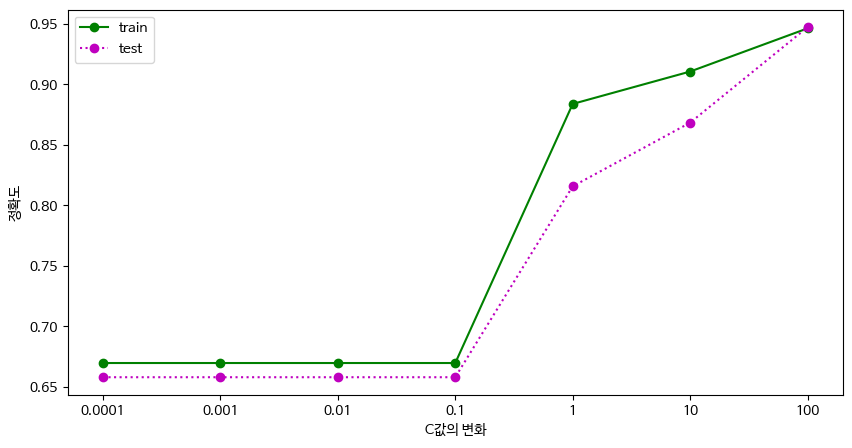

In [55]:
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
train_score = []
test_score = []

for i in C:
    # SVC -> LinearSVC
    linear_svm = LinearSVC(C = i, loss = 'hinge').fit(X_train, y_train)
    scoretr = linear_svm.score(X_train, y_train)
    scorete = linear_svm.score(X_test, y_test)
    train_score.append(scoretr)
    test_score.append(scorete)

plt.figure(figsize = (10, 5))
plt.plot(train_score, 'go-')
plt.plot(test_score, 'mo:')
plt.xticks(range(len(C)), C)
plt.xlabel('C값의 변화')
plt.ylabel('정확도')
plt.legend(['train', 'test'])
plt.show()

Logistic Regression은 확률값으로 WX의 값에 따라 0 ~ 1 사이의 확률값으로 예측해지만 SVM은 확률값이 아닌 1 or 0 으로 예측한다.

Logistic Regression의 Cost는 Z(Decision Boundary)가 아무리 커져도 0이 되지 않는다. 반면, SVM의 Cost는 Z가 1 or -1인 순간 0이 된다.(이를 Hinge Loss라고 하는데, 비확률적 분류 모델인 SVM의 Cost로 적합하다.)

LinearSVC()
  - kernel = 'linear'을 갖는 SVC()와 비슷하지만 libsvm이 아닌 liblinear의 관점에서 구현되어 규제와 loss함수 선택에 있어서 유연하며 데이터가 클 경우에 SVC()는 속도가 현저히 느려지기 때문에 LinearSVC()를 사용것을 권장한다.
  - penalty 매개변수로 규제를 선택할 수 있다.
  - pnealty의 기본값은 'l2'
  - loss의 기본값은 'squared hinge', SVC(kernel = 'linear')와 같은 효과를 위해서는 'hinge'로 설정한다.
    - hinge loss?
  - 데이터의 스케일을 맞추지 않고 SVC 모델과 비교하게 되면 차이가 크게 난다. StandardScaler를 사용하면 데이터의 스케일을 자동으로 맞춰준다.

### 스케일링 전, 후 비교

In [56]:
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

X,y = make_blobs(n_samples = 400, centers= 2, random_state = 33) # 33

In [ ]:
X[:, 0] # 모든 행의 0번째 열

In [58]:
np.sum(np.square(X[:, 0])), np.sum(np.square(X[:, 1]))

(5997.139810993906, 5434.833843369062)

In [59]:
X[:, 0] = X[:, 0]*100

In [60]:
np.sum(np.square(X[:, 0])), np.sum(np.square(X[:, 1]))

(59971398.10993906, 5434.833843369062)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)

pre_scale = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)

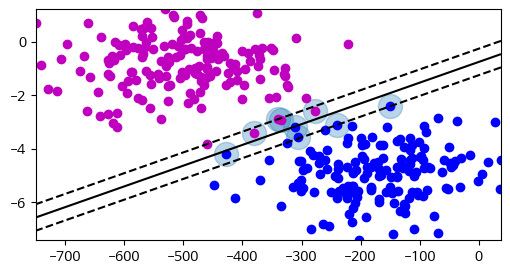

In [63]:
xmin = X_train[:, 0].min()
xmax = X_train[:, 0].max()
ymin = X_train[:, 1].min()
ymax = X_train[:, 1].max()
xx = np.linspace(xmin, xmax, 10)
yy = np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx, yy)

Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = pre_scale.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1, 0, 1]
plt.figure(figsize = (6, 3))
plt.plot(X_train[:, 0][y_train == 1], X_train[:,1][y_train == 1], 'bo')
plt.plot(X_train[:, 0][y_train == 0], X_train[:,1][y_train == 0], 'mo')
plt.contour(X1, X2, Z, levels, colors='k', linestyles=['dashed', 'solid', 'dashed'])
plt.scatter(pre_scale.support_vectors_[:, 0],
            pre_scale.support_vectors_[:, 1], s=300, alpha=0.3)

plt.show()

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

np.sum(np.square(X_train[:, 0])), np.sum(np.square(X_train[:, 1]))

(48575410.78104688, 4195.653761381586)

In [65]:
X_scale = scaler.fit_transform(X_train)

np.sum(np.square(X_scale[:, 0])), np.sum(np.square(X_scale[:, 1]))

(319.9999999999999, 320.0000000000001)

In [66]:
fit_scale = SVC(kernel = 'linear', C = 1).fit(X_scale, y_train)

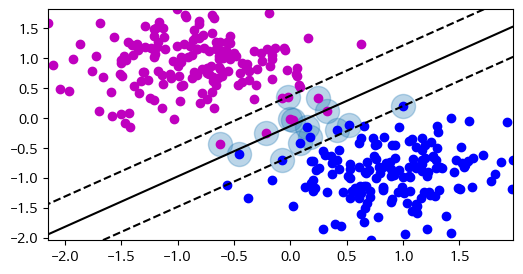

In [68]:
xmin = X_scale[:, 0].min()
xmax = X_scale[:, 0].max()
ymin = X_scale[:, 1].min()
ymax = X_scale[:, 1].max()
xx = np.linspace(xmin, xmax, 10)
yy = np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx, yy)

Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = fit_scale.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1, 0, 1]

plt.figure(figsize = (6, 3))
plt.plot(X_scale[:, 0][y_train == 1], X_scale[:,1][y_train == 1], 'bo')
plt.plot(X_scale[:, 0][y_train == 0], X_scale[:,1][y_train == 0], 'mo')
plt.contour(X1, X2, Z, levels, colors='k', linestyles=['dashed', 'solid', 'dashed'])
plt.scatter(fit_scale.support_vectors_[:, 0],
            fit_scale.support_vectors_[:, 1], s=300, alpha=0.3)

plt.show()